In [1]:

path_data = '/'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import os
import pickle

import pandas as pd
import requests
import torch
from pkg_resources import packaging
from PIL import Image
import tqdm
from pathlib import Path
print("Torch version:", torch.__version__)

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

plt.style.use('ggplot')

Torch version: 2.2.1+cu121


In [12]:
#!pip install accelerate

In [13]:
data_unfiltered = pd.read_csv("/".join([path_data, "images_v2.csv"]))
#display(data_unfiltered)

In [14]:
len(data_unfiltered)

38479

In [15]:
subjective_topics = ['Favorite home decorations', 'Favourite item in kitchen', 'Favourite sports clubs', 'How the most loved item is used', 'icons', 'Idols', 'Latest furniture bought', ' looking over the shoulder', 'Most loved item', 'Most loved toy', 'Most played songs on the radio', 'Music idol', 'Next big thing you are planning to buy', 'Playing with most loved toy', 'Thing I dream about having', 'Things I wish I had', 'Using most loved item', 'Youth culture', 'What I wish I could buy']

In [16]:
unique_topics = data_unfiltered['topics'].unique()

In [17]:
Subjective_topic_list = []

for topic in unique_topics:
    topic_ = topic.replace('/ ', ', ')
    topic_split = topic_.split(',')
    for split in topic_split:
        if split in subjective_topics:
            Subjective_topic_list.append(topic)

In [18]:
data = data_unfiltered[~data_unfiltered['topics'].isin(Subjective_topic_list)]
display(data)

,id,country.name,country.id,region.id,type,imageRelPath,topics,place,income
1,5d4bf31ccf0b3a0f3f359814,Burundi,bi,af,image,assets/5d4bf31ccf0b3a0f3f359814/5d4bf31ccf0b3a...,Family snapshots,butoyi,26.994581
2,5d4bf31ccf0b3a0f3f35982a,Burundi,bi,af,image,assets/5d4bf31ccf0b3a0f3f35982a/5d4bf31ccf0b3a...,Cutlery,butoyi,26.994581
3,5d4bf31ccf0b3a0f3f35982e,Burundi,bi,af,image,assets/5d4bf31ccf0b3a0f3f35982e/5d4bf31ccf0b3a...,Family,butoyi,26.994581
4,5d4bf31ccf0b3a0f3f359830,Burundi,bi,af,image,assets/5d4bf31ccf0b3a0f3f359830/5d4bf31ccf0b3a...,Place where eating dinner,butoyi,26.994581
5,5d4bf31dcf0b3a0f3f35983c,Burundi,bi,af,image,assets/5d4bf31dcf0b3a0f3f35983c/5d4bf31dcf0b3a...,Plate of food,butoyi,26.994581
...,...,...,...,...,...,...,...,...,...
38474,5ec4f5513f62767d97a47324,France,fr,eu,image,assets/5ec4f5513f62767d97a47324/5ec4f5513f6276...,Bed,larriere,19671.000000
38475,5ec4f5513f62767d97a47325,France,fr,eu,image,assets/5ec4f5513f62767d97a47325/5ec4f5513f6276...,Bathroom/Toilet,larriere,19671.000000
38476,5ec4f5523f62767d97a47327,France,fr,eu,image,assets/5ec4f5523f62767d97a47327/5ec4f5523f6276...,Armchair,larriere,19671.000000
38477,5ec4f5523f62767d97a47328,France,fr,eu,image,assets/5ec4f5523f62767d97a47328/5ec4f5523f6276...,Armchair,larriere,19671.000000


In [19]:
len(data)

36754

## Caption with Llava

In [6]:
# !pip install -q -U transformers==4.37.2
# !pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

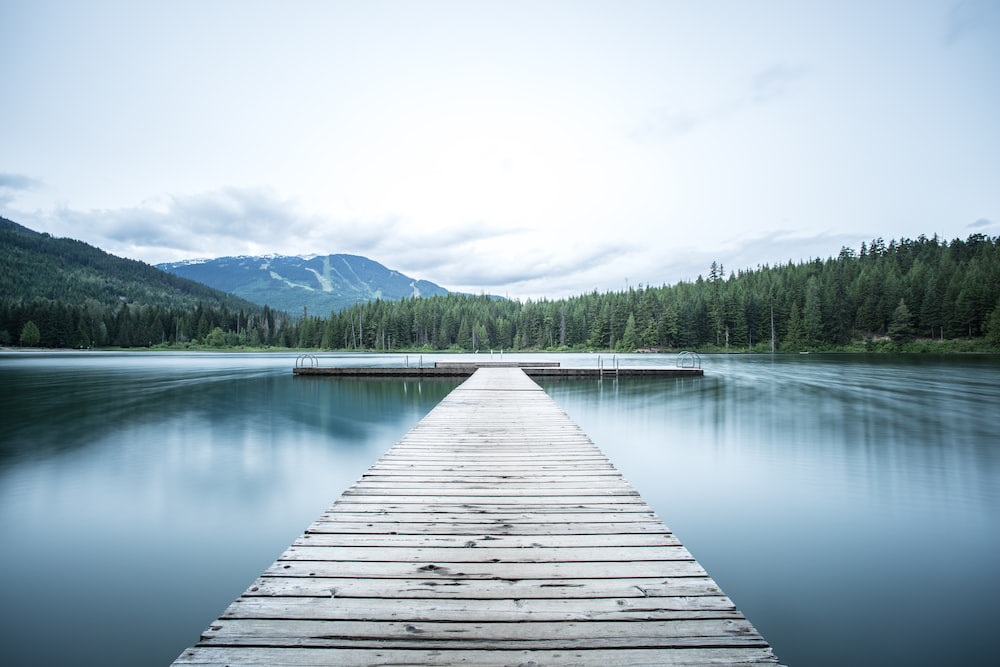

In [6]:
image_url = "https://llava-vl.github.io/static/images/view.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [10]:
from transformers import AutoProcessor, LlavaForConditionalGeneration

model = LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-7b-hf")
processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf")
prompt = "USER: <image>\nWhat's the content of the image? ASSISTANT:"
url = "https://www.ilankelman.org/stopsigns/australia.jpg"

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
prompt = "USER: <image>\nWhat's the content of the image? ASSISTANT:"
url = "https://www.ilankelman.org/stopsigns/australia.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)

inputs = processor(images=image, text=prompt, return_tensors="pt")

# Generate
generate_ids = model.generate(**inputs, max_new_tokens=15)
processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.
Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


"USER:  \nWhat's the content of the image? ASSISTANT: The image features a pier extending out into a large body of water, with"

In [10]:
path_images = [path_data + s for s in list(data['imageRelPath'])]
image_ids1 = [s.split("/")[9] for s in path_images]
image_ids = data['id']
assert(set(image_ids1) == set(image_ids))


['/nfs/turbo/coe-mihalcea/shared_data/MCLIP/dollar-street/dataset_dollarstreet/assets/5d4bf31ccf0b3a0f3f359814/5d4bf31ccf0b3a0f3f359814.jpg',
 '/nfs/turbo/coe-mihalcea/shared_data/MCLIP/dollar-street/dataset_dollarstreet/assets/5d4bf31ccf0b3a0f3f35982a/5d4bf31ccf0b3a0f3f35982a.jpg']

In [11]:
len(path_images)

36754

In [12]:
image_path_list = []
imgs_corrupted = []
for image_path in tqdm.tqdm(path_images):
        path_to_img = image_path
        if Path(path_to_img).is_file():
            image_path_list.append(path_to_img)
        else:
            imgs_corrupted.append(path_to_img)
len(image_path_list)

100%|██████████| 36754/36754 [01:22<00:00, 447.62it/s]


36754

In [ ]:
def load_image(url_or_path):
    if url_or_path.startswith("http://") or url_or_path.startswith("https://"):
        return Image.open(requests.get(url_or_path, stream=True).raw)
    else:
        return Image.open(url_or_path).convert("RGB")

In [17]:
def dataset(k_images):
    for image_path in tqdm.tqdm(k_images):
        if Path(image_path).is_file():
            yield image_path

In [26]:
count = 1000
end = len(image_path_list) // count + 1
print(end)
#image2Llavacaption_dict = {}
done_pathlist = []
#gencaptions_list = []

for k in range(26, end):
    k_images = image_path_list[count*k:count*(k+1)]
    print(f"k: {k}")
    print(len(k_images))
    caption_list = []
    
    # Generate
    prompt = "USER: <image>\nWhat does this image show?\nASSISTANT:"

    #outputs = pipe(load_image(image_path), prompt=prompt, generate_kwargs={"max_new_tokens": 100})
    for out in tqdm.tqdm(pipe(dataset(k_images), prompt=prompt, generate_kwargs={"max_new_tokens": 100})):
        caption_list.append(out[0]["generated_text"])        
                
    for path, caption in zip(k_images, caption_list):
        image2Llavacaption_dict[path] = caption
    f = open("image2Llavacaption_dict.pkl","wb")
    # write the python object (dict) to pickle file
    pickle.dump(image2Llavacaption_dict,f)
    # close file
    f.close()
    print(f"{k} dictionary is saved")

37
k: 26
1000


0it [00:00, ?it/s]
  1%|          | 9/1000 [00:00<00:58, 16.86it/s]Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)

1it [00:27, 27.73s/it]0 [00:16<00:58, 16.86it/s]
  2%|▏         | 16/1000 [00:27<28:52,  1.76s/it]
11it [00:40,  3.04s/it]0 [00:28<18:48,  1.15s/it]
  3%|▎         | 28/1000 [00:41<16:45,  1.03s/it]
21it [00:57,  2.23s/it]0 [00:56<16:45,  1.03s/it]
  4%|▎         | 36/1000 [00:57<20:16,  1.26s/it]
31it [01:15,  2.04s/it]0 [00:58<17:00,  1.06s/it]
  5%|▍         | 48/1000 [01:1

391it [11:31,  1.68s/it]0 [11:15<06:04,  1.65it/s]
 41%|████      | 408/1000 [11:34<06:26,  1.53it/s]
401it [11:51,  1.76s/it]0 [11:35<05:35,  1.76it/s]
 42%|████▏     | 418/1000 [11:54<06:43,  1.44it/s]
411it [12:10,  1.82s/it]0 [11:54<05:51,  1.65it/s]
 43%|████▎     | 428/1000 [12:13<06:10,  1.54it/s]
421it [12:30,  1.85s/it]0 [12:14<05:21,  1.78it/s]
 44%|████▍     | 438/1000 [12:33<06:19,  1.48it/s]
431it [12:49,  1.89s/it]0 [12:33<05:23,  1.74it/s]
 45%|████▍     | 448/1000 [12:53<06:58,  1.32it/s]
441it [13:09,  1.92s/it]0 [12:54<06:31,  1.41it/s]
 46%|████▌     | 458/1000 [13:13<06:15,  1.44it/s]
451it [13:29,  1.94s/it]0 [13:13<05:24,  1.67it/s]
 47%|████▋     | 468/1000 [13:32<06:07,  1.45it/s]
461it [13:49,  1.95s/it]0 [13:33<05:21,  1.65it/s]
 48%|████▊     | 477/1000 [13:51<06:09,  1.42it/s]
471it [14:07,  1.91s/it]0 [13:51<03:54,  2.23it/s]
 49%|████▊     | 486/1000 [14:07<09:02,  1.05s/it]
481it [14:24,  1.83s/it]0 [14:08<06:17,  1.36it/s]
 50%|████▉     | 498/1000 [14:2

 80%|███████▉  | 797/1000 [23:28<03:16,  1.03it/s]
791it [23:44,  1.69s/it]0 [23:28<02:31,  1.33it/s]
 81%|████████  | 807/1000 [23:45<03:18,  1.03s/it]
801it [24:01,  1.68s/it]0 [23:56<03:18,  1.03s/it]
 82%|████████▏ | 817/1000 [24:02<02:44,  1.11it/s]
811it [24:18,  1.71s/it]0 [24:02<01:49,  1.65it/s]
 83%|████████▎ | 826/1000 [24:19<03:08,  1.08s/it]
821it [24:36,  1.72s/it]0 [24:19<02:14,  1.28it/s]
 84%|████████▍ | 838/1000 [24:42<02:34,  1.05it/s]
831it [24:59,  1.89s/it]0 [24:42<02:23,  1.12it/s]
 85%|████████▍ | 848/1000 [25:04<02:28,  1.02it/s]
841it [25:22,  2.00s/it]0 [25:05<02:15,  1.11it/s]
 86%|████████▌ | 858/1000 [25:27<02:16,  1.04it/s]
851it [25:44,  2.08s/it]0 [25:28<02:05,  1.13it/s]
 87%|████████▋ | 868/1000 [25:50<02:10,  1.01it/s]
861it [26:07,  2.14s/it]0 [25:50<01:57,  1.11it/s]
 88%|████████▊ | 878/1000 [26:13<02:00,  1.01it/s]
871it [26:30,  2.18s/it]0 [26:13<01:49,  1.11it/s]
 89%|████████▉ | 888/1000 [26:35<01:49,  1.02it/s]
881it [26:51,  2.16s/it]0 [26:3

26 dictionary is saved
k: 27
1000


0it [00:00, ?it/s]
  1%|          | 7/1000 [00:00<02:10,  7.62it/s]
1it [00:16, 16.91s/it]0 [00:00<02:07,  7.76it/s]
  2%|▏         | 18/1000 [00:17<11:21,  1.44it/s]
11it [00:33,  2.64s/it]0 [00:29<11:21,  1.44it/s]
  3%|▎         | 26/1000 [00:33<16:45,  1.03s/it]
21it [00:47,  1.97s/it]0 [00:33<11:59,  1.35it/s]
  4%|▍         | 38/1000 [00:48<11:01,  1.45it/s]
31it [01:02,  1.76s/it]0 [00:59<11:01,  1.45it/s]
  5%|▍         | 48/1000 [01:03<10:55,  1.45it/s]
41it [01:20,  1.77s/it]0 [01:19<10:55,  1.45it/s]
  6%|▌         | 58/1000 [01:28<20:22,  1.30s/it]
51it [01:45,  2.03s/it]0 [01:29<19:57,  1.27s/it]
  7%|▋         | 68/1000 [01:53<18:31,  1.19s/it]
61it [02:10,  2.18s/it]0 [01:54<17:47,  1.15s/it]
  8%|▊         | 78/1000 [02:17<18:12,  1.19s/it]
71it [02:34,  2.25s/it]0 [02:18<17:01,  1.11s/it]
  9%|▉         | 88/1000 [02:41<18:32,  1.22s/it]
81it [02:59,  2.32s/it]0 [02:42<17:18,  1.14s/it]
 10%|▉         | 98/1000 [03:05<16:29,  1.10s/it]
91it [03:23,  2.35s/it]0 [03:06<1

 36%|███▌      | 358/1000 [11:53<09:08,  1.17it/s]
351it [12:10,  2.17s/it]0 [11:54<08:29,  1.26it/s]
 37%|███▋      | 368/1000 [12:15<09:27,  1.11it/s]
361it [12:32,  2.18s/it]0 [12:16<08:36,  1.22it/s]
 38%|███▊      | 378/1000 [12:37<10:02,  1.03it/s]
371it [12:54,  2.17s/it]0 [12:38<10:01,  1.03it/s]
 39%|███▉      | 388/1000 [12:57<06:06,  1.67it/s]
381it [13:13,  2.09s/it]0 [12:58<05:09,  1.98it/s]
 40%|███▉      | 398/1000 [13:15<05:10,  1.94it/s]
391it [13:31,  2.02s/it]0 [13:15<04:30,  2.22it/s]
 41%|████      | 408/1000 [13:34<05:29,  1.80it/s]
401it [13:50,  1.96s/it]0 [13:34<04:42,  2.09it/s]
 42%|████▏     | 418/1000 [13:52<05:04,  1.91it/s]
411it [14:08,  1.93s/it]0 [13:52<04:16,  2.27it/s]
 43%|████▎     | 428/1000 [14:10<04:45,  2.01it/s]
421it [14:26,  1.89s/it]0 [14:10<04:05,  2.33it/s]
 44%|████▍     | 438/1000 [14:28<05:05,  1.84it/s]
431it [14:45,  1.88s/it]0 [14:29<04:18,  2.17it/s]
 45%|████▍     | 448/1000 [14:47<05:00,  1.83it/s]
441it [15:03,  1.87s/it]0 [14:4

 75%|███████▍  | 748/1000 [23:45<03:32,  1.18it/s]
741it [24:02,  2.02s/it]0 [23:45<03:10,  1.31it/s]
 76%|███████▌  | 758/1000 [24:06<03:26,  1.17it/s]
751it [24:23,  2.06s/it]0 [24:07<03:04,  1.31it/s]
 77%|███████▋  | 768/1000 [24:28<03:15,  1.18it/s]
761it [24:42,  2.02s/it]0 [24:28<02:55,  1.32it/s]
 78%|███████▊  | 778/1000 [24:47<02:59,  1.24it/s]
771it [25:02,  1.99s/it]0 [24:47<02:41,  1.37it/s]
 79%|███████▉  | 788/1000 [25:06<02:53,  1.22it/s]
781it [25:23,  2.03s/it]0 [25:07<02:35,  1.36it/s]
 80%|███████▉  | 798/1000 [25:27<02:49,  1.19it/s]
791it [25:44,  2.06s/it]0 [25:28<02:31,  1.33it/s]
 81%|████████  | 808/1000 [25:48<02:09,  1.48it/s]
801it [26:05,  2.07s/it]0 [25:49<02:05,  1.52it/s]
 82%|████████▏ | 818/1000 [26:10<02:44,  1.10it/s]
811it [26:27,  2.11s/it]0 [26:12<03:13,  1.07s/it]
 82%|████████▏ | 820/1000 [26:27<16:14,  5.41s/it]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To 

 51%|█████     | 508/1000 [16:54<06:06,  1.34it/s]
501it [17:10,  2.10s/it]0 [16:54<05:26,  1.51it/s]
 52%|█████▏    | 518/1000 [17:14<05:55,  1.35it/s]
511it [17:31,  2.08s/it]0 [17:14<05:15,  1.53it/s]
 53%|█████▎    | 528/1000 [17:34<05:54,  1.33it/s]
521it [17:50,  2.05s/it]0 [17:35<05:12,  1.51it/s]
 54%|█████▍    | 538/1000 [17:54<05:36,  1.37it/s]
531it [18:11,  2.06s/it]0 [17:55<04:57,  1.55it/s]
 55%|█████▍    | 548/1000 [18:15<05:32,  1.36it/s]
541it [18:32,  2.06s/it]0 [18:16<05:23,  1.39it/s]
 56%|█████▌    | 558/1000 [18:35<05:28,  1.34it/s]
551it [18:50,  1.98s/it]0 [18:36<04:49,  1.52it/s]
 57%|█████▋    | 566/1000 [18:50<08:22,  1.16s/it]
561it [19:06,  1.87s/it]0 [18:50<05:12,  1.38it/s]
 58%|█████▊    | 579/1000 [19:06<05:40,  1.23it/s]
571it [19:22,  1.79s/it]0 [19:19<05:40,  1.23it/s]
 59%|█████▊    | 586/1000 [19:22<08:21,  1.21s/it]
581it [19:38,  1.72s/it]0 [19:22<05:37,  1.22it/s]
 60%|█████▉    | 598/1000 [19:38<07:04,  1.05s/it]
591it [19:54,  1.69s/it]0 [19:4

 94%|█████████▎| 937/1000 [29:11<00:55,  1.14it/s]
931it [29:27,  1.74s/it]0 [29:11<00:39,  1.54it/s]
 95%|█████████▍| 948/1000 [29:28<00:45,  1.13it/s]
941it [29:41,  1.63s/it]0 [29:39<00:45,  1.13it/s]
 96%|█████████▌| 956/1000 [29:41<00:41,  1.07it/s]
951it [29:57,  1.63s/it]0 [29:42<00:28,  1.47it/s]
 97%|█████████▋| 969/1000 [29:58<00:22,  1.35it/s]
961it [30:13,  1.61s/it]0 [30:09<00:22,  1.35it/s]
 98%|█████████▊| 978/1000 [30:15<00:11,  1.89it/s]
971it [30:30,  1.64s/it]0 [30:15<00:09,  2.22it/s]
 99%|█████████▉| 988/1000 [30:32<00:06,  1.95it/s]
981it [30:47,  1.66s/it]0 [30:32<00:04,  2.30it/s]
100%|█████████▉| 998/1000 [30:49<00:01,  1.99it/s]
991it [31:04,  1.67s/it]0 [30:49<00:00,  2.13it/s]
100%|██████████| 1000/1000 [31:04<00:00,  1.86s/it]
1000it [31:04,  1.86s/it]


28 dictionary is saved
k: 29
1000


0it [00:00, ?it/s]
  1%|          | 8/1000 [00:01<03:59,  4.14it/s]
1it [00:18, 18.26s/it]0 [00:02<04:08,  3.99it/s]
  2%|▏         | 18/1000 [00:20<08:27,  1.94it/s]
11it [00:36,  2.87s/it]0 [00:20<07:03,  2.32it/s]
  3%|▎         | 28/1000 [00:38<08:21,  1.94it/s]
21it [00:54,  2.27s/it]0 [00:38<06:57,  2.32it/s]
  4%|▍         | 38/1000 [00:56<08:51,  1.81it/s]
31it [01:12,  2.08s/it]0 [00:56<07:18,  2.19it/s]
  5%|▍         | 48/1000 [01:14<07:43,  2.05it/s]
41it [01:30,  1.95s/it]0 [01:14<06:16,  2.53it/s]
  6%|▌         | 57/1000 [01:30<13:13,  1.19it/s]
51it [01:47,  1.85s/it]0 [01:31<09:19,  1.68it/s]
  7%|▋         | 66/1000 [01:47<13:59,  1.11it/s]
61it [02:02,  1.73s/it]0 [01:47<09:25,  1.65it/s]
  8%|▊         | 78/1000 [02:03<11:48,  1.30it/s]
71it [02:19,  1.74s/it]0 [02:14<11:48,  1.30it/s]
  9%|▉         | 88/1000 [02:20<11:44,  1.29it/s]
81it [02:36,  1.72s/it]0 [02:34<11:44,  1.29it/s]
 10%|▉         | 97/1000 [02:37<12:29,  1.20it/s]
91it [02:53,  1.72s/it]0 [02:37<0

 40%|███▉      | 398/1000 [12:05<06:27,  1.55it/s]
391it [12:21,  1.90s/it]0 [12:05<05:39,  1.77it/s]
 41%|████      | 408/1000 [12:23<06:14,  1.58it/s]
401it [12:40,  1.91s/it]0 [12:24<05:26,  1.81it/s]
 42%|████▏     | 418/1000 [12:43<06:16,  1.54it/s]
411it [12:59,  1.92s/it]0 [12:43<05:28,  1.77it/s]
 43%|████▎     | 428/1000 [13:02<06:15,  1.52it/s]
421it [13:18,  1.92s/it]0 [13:03<04:59,  1.91it/s]
 44%|████▍     | 438/1000 [13:28<13:08,  1.40s/it]
431it [13:46,  2.17s/it]0 [13:29<12:35,  1.35s/it]
 45%|████▍     | 448/1000 [13:56<13:39,  1.48s/it]
441it [14:14,  2.36s/it]0 [13:57<12:54,  1.41s/it]
 46%|████▌     | 458/1000 [14:23<13:18,  1.47s/it]
451it [14:41,  2.46s/it]0 [14:25<12:36,  1.40s/it]
 47%|████▋     | 468/1000 [14:52<13:41,  1.54s/it]
461it [15:11,  2.61s/it]0 [14:54<12:42,  1.44s/it]
 48%|████▊     | 478/1000 [15:20<12:36,  1.45s/it]
471it [15:38,  2.65s/it]0 [15:21<11:56,  1.38s/it]
 49%|████▉     | 488/1000 [15:48<12:43,  1.49s/it]
481it [16:06,  2.69s/it]0 [15:4

751it [24:37,  1.83s/it]0 [24:21<02:08,  1.88it/s]
 77%|███████▋  | 768/1000 [24:39<02:36,  1.48it/s]
761it [24:55,  1.84s/it]0 [24:39<02:12,  1.75it/s]
 78%|███████▊  | 776/1000 [24:56<04:46,  1.28s/it]
771it [25:11,  1.77s/it]0 [24:56<02:57,  1.25it/s]
 79%|███████▉  | 788/1000 [25:12<03:18,  1.07it/s]
781it [25:28,  1.73s/it]0 [25:24<03:18,  1.07it/s]
 80%|███████▉  | 799/1000 [25:28<02:28,  1.35it/s]
791it [25:44,  1.70s/it]0 [25:44<02:28,  1.35it/s]
 81%|████████  | 806/1000 [25:44<03:57,  1.22s/it]
801it [26:01,  1.69s/it]0 [25:45<02:56,  1.09it/s]
 82%|████████▏ | 818/1000 [26:07<03:12,  1.06s/it]
811it [26:24,  1.87s/it]0 [26:07<02:54,  1.04it/s]
 83%|████████▎ | 828/1000 [26:30<02:50,  1.01it/s]
821it [26:45,  1.94s/it]0 [26:30<02:36,  1.09it/s]
 84%|████████▍ | 838/1000 [26:51<02:34,  1.05it/s]
831it [27:05,  1.96s/it]0 [26:51<02:24,  1.11it/s]
 85%|████████▍ | 848/1000 [27:11<02:21,  1.07it/s]
841it [27:28,  2.05s/it]0 [27:11<02:10,  1.16it/s]
 86%|████████▌ | 858/1000 [27:3

29 dictionary is saved
k: 30
1000


0it [00:00, ?it/s]
  1%|          | 6/1000 [00:00<00:43, 22.98it/s]
1it [00:13, 13.95s/it]0 [00:00<00:42, 23.29it/s]
  2%|▏         | 18/1000 [00:14<14:07,  1.16it/s]
11it [00:31,  2.58s/it]0 [00:27<14:07,  1.16it/s]
  3%|▎         | 28/1000 [00:36<15:15,  1.06it/s]
21it [00:53,  2.33s/it]0 [00:36<13:58,  1.16it/s]
  4%|▍         | 38/1000 [00:58<13:59,  1.15it/s]
31it [01:15,  2.26s/it]0 [00:58<12:35,  1.27it/s]
  5%|▍         | 48/1000 [01:20<15:30,  1.02it/s]
41it [01:36,  2.21s/it]0 [01:20<13:33,  1.17it/s]
  6%|▌         | 58/1000 [01:40<13:20,  1.18it/s]
51it [01:57,  2.19s/it]0 [01:41<12:19,  1.27it/s]
  7%|▋         | 68/1000 [02:02<13:41,  1.13it/s]
61it [02:19,  2.19s/it]0 [02:03<12:11,  1.27it/s]
  8%|▊         | 78/1000 [02:24<13:07,  1.17it/s]
71it [02:40,  2.15s/it]0 [02:24<11:56,  1.29it/s]
  9%|▉         | 88/1000 [02:45<14:12,  1.07it/s]
81it [03:02,  2.16s/it]0 [02:45<12:45,  1.19it/s]
 10%|▉         | 98/1000 [03:07<13:05,  1.15it/s]
91it [03:22,  2.11s/it]0 [03:07<1

 38%|███▊      | 378/1000 [11:27<10:15,  1.01it/s]
371it [11:44,  2.14s/it]0 [11:27<09:27,  1.09it/s]
 39%|███▉      | 388/1000 [11:50<10:18,  1.01s/it]
381it [12:07,  2.19s/it]0 [11:50<09:26,  1.08it/s]
 40%|███▉      | 398/1000 [12:18<11:27,  1.14s/it]
391it [12:35,  2.38s/it]0 [12:19<10:14,  1.02s/it]
 41%|████      | 408/1000 [12:41<10:05,  1.02s/it]
401it [12:58,  2.35s/it]0 [12:42<09:06,  1.08it/s]
 42%|████▏     | 418/1000 [13:04<09:38,  1.01it/s]
411it [13:20,  2.32s/it]0 [13:04<08:51,  1.09it/s]
 43%|████▎     | 426/1000 [13:25<12:16,  1.28s/it]
421it [13:41,  2.23s/it]0 [13:25<05:33,  1.71it/s]
 44%|████▎     | 436/1000 [13:41<11:25,  1.22s/it]
431it [13:57,  2.05s/it]0 [13:41<07:19,  1.28it/s]
 45%|████▍     | 446/1000 [13:57<11:29,  1.24s/it]
441it [14:12,  1.88s/it]0 [13:57<07:38,  1.20it/s]
 46%|████▌     | 458/1000 [14:16<12:14,  1.36s/it]
451it [14:34,  1.98s/it]0 [14:17<11:54,  1.32s/it]
 47%|████▋     | 468/1000 [14:42<11:56,  1.35s/it]
461it [14:58,  2.12s/it]0 [14:4

 74%|███████▍  | 738/1000 [24:46<04:16,  1.02it/s]
731it [25:03,  1.98s/it]0 [24:47<03:53,  1.12it/s]
 75%|███████▍  | 748/1000 [25:09<04:08,  1.01it/s]
741it [25:26,  2.07s/it]0 [25:10<03:47,  1.11it/s]
 76%|███████▌  | 758/1000 [25:32<03:58,  1.02it/s]
751it [25:49,  2.12s/it]0 [25:33<03:36,  1.11it/s]
 77%|███████▋  | 768/1000 [25:54<03:54,  1.01s/it]
761it [26:11,  2.17s/it]0 [25:55<03:34,  1.08it/s]
 78%|███████▊  | 778/1000 [26:17<03:40,  1.01it/s]
771it [26:34,  2.21s/it]0 [26:18<03:18,  1.11it/s]
 79%|███████▉  | 788/1000 [26:40<03:03,  1.16it/s]
781it [27:00,  2.32s/it]0 [26:44<06:58,  1.98s/it]
 80%|███████▉  | 798/1000 [27:03<02:21,  1.43it/s]
791it [27:19,  2.19s/it]0 [27:04<01:59,  1.68it/s]
 81%|████████  | 808/1000 [27:22<01:59,  1.60it/s]
801it [27:38,  2.11s/it]0 [27:22<01:42,  1.86it/s]
 82%|████████▏ | 818/1000 [27:41<02:15,  1.35it/s]
811it [27:58,  2.06s/it]0 [27:41<01:55,  1.57it/s]
 83%|████████▎ | 828/1000 [28:01<01:56,  1.48it/s]
821it [28:17,  2.02s/it]0 [28:0

30 dictionary is saved
k: 31
1000


0it [00:00, ?it/s]
  1%|          | 8/1000 [00:02<05:04,  3.26it/s]
1it [00:18, 18.01s/it]0 [00:02<04:29,  3.67it/s]
  2%|▏         | 18/1000 [00:20<10:16,  1.59it/s]
11it [00:37,  2.95s/it]0 [00:20<08:06,  2.02it/s]
  3%|▎         | 28/1000 [00:39<10:07,  1.60it/s]
21it [00:56,  2.35s/it]0 [00:39<08:16,  1.96it/s]
  4%|▎         | 37/1000 [00:58<11:56,  1.34it/s]
31it [01:15,  2.15s/it]0 [00:59<10:35,  1.51it/s]
  5%|▍         | 48/1000 [01:16<07:28,  2.12it/s]
41it [01:31,  1.95s/it]0 [01:17<06:08,  2.58it/s]
  6%|▌         | 58/1000 [01:32<06:08,  2.56it/s]
51it [01:48,  1.87s/it]0 [01:32<04:55,  3.18it/s]
  7%|▋         | 68/1000 [01:49<06:16,  2.47it/s]
61it [02:05,  1.81s/it]0 [01:49<04:59,  3.11it/s]
  8%|▊         | 78/1000 [02:06<06:34,  2.34it/s]
71it [02:20,  1.70s/it]0 [02:06<05:12,  2.95it/s]
  9%|▉         | 88/1000 [02:21<05:30,  2.76it/s]
81it [02:37,  1.70s/it]0 [02:21<04:24,  3.44it/s]
 10%|▉         | 98/1000 [02:38<06:09,  2.44it/s]
91it [02:53,  1.68s/it]0 [02:38<0

 37%|███▋      | 368/1000 [10:17<07:50,  1.34it/s]
361it [10:33,  1.83s/it]0 [10:17<07:11,  1.46it/s]
 38%|███▊      | 378/1000 [10:37<07:31,  1.38it/s]
371it [10:54,  1.89s/it]0 [10:38<06:39,  1.55it/s]
 39%|███▉      | 388/1000 [10:57<07:19,  1.39it/s]
381it [11:13,  1.89s/it]0 [10:58<06:29,  1.57it/s]
 40%|███▉      | 398/1000 [11:16<06:55,  1.45it/s]
391it [11:33,  1.93s/it]0 [11:17<06:08,  1.63it/s]
 41%|████      | 408/1000 [11:37<07:20,  1.34it/s]
401it [11:51,  1.88s/it]0 [11:37<06:21,  1.55it/s]
 42%|████▏     | 418/1000 [11:54<06:26,  1.50it/s]
411it [12:11,  1.92s/it]0 [11:55<06:00,  1.61it/s]
 43%|████▎     | 428/1000 [12:14<06:45,  1.41it/s]
421it [12:31,  1.95s/it]0 [12:15<05:59,  1.59it/s]
 44%|████▍     | 438/1000 [12:34<06:39,  1.41it/s]
431it [12:51,  1.97s/it]0 [12:35<05:54,  1.58it/s]
 45%|████▍     | 448/1000 [12:55<06:47,  1.35it/s]
441it [13:11,  1.98s/it]0 [12:55<05:55,  1.55it/s]
 46%|████▌     | 457/1000 [13:11<08:43,  1.04it/s]
451it [13:27,  1.86s/it]0 [13:2

 79%|███████▉  | 788/1000 [22:58<02:30,  1.41it/s]
781it [23:13,  1.66s/it]0 [22:58<02:14,  1.57it/s]
 80%|███████▉  | 798/1000 [23:17<02:26,  1.38it/s]
791it [23:33,  1.78s/it]0 [23:17<02:10,  1.55it/s]
 81%|████████  | 808/1000 [23:37<02:30,  1.28it/s]
801it [23:54,  1.86s/it]0 [23:38<02:10,  1.46it/s]
 82%|████████▏ | 818/1000 [23:58<02:13,  1.36it/s]
811it [24:14,  1.92s/it]0 [23:58<01:59,  1.52it/s]
 83%|████████▎ | 828/1000 [24:18<02:07,  1.35it/s]
821it [24:34,  1.94s/it]0 [24:18<01:52,  1.53it/s]
 84%|████████▍ | 838/1000 [24:38<02:00,  1.35it/s]
831it [24:55,  1.97s/it]0 [24:38<01:45,  1.53it/s]
 85%|████████▍ | 848/1000 [24:58<01:54,  1.32it/s]
841it [25:14,  1.95s/it]0 [24:58<01:41,  1.48it/s]
 86%|████████▌ | 858/1000 [25:18<01:48,  1.31it/s]
851it [25:33,  1.95s/it]0 [25:18<01:37,  1.45it/s]
 87%|████████▋ | 868/1000 [25:46<03:13,  1.47s/it]
861it [26:03,  2.25s/it]0 [25:47<03:03,  1.40s/it]
 88%|████████▊ | 878/1000 [26:15<03:55,  1.93s/it]
871it [26:34,  2.51s/it]0 [26:1

31 dictionary is saved
k: 32
1000


0it [00:00, ?it/s]
  0%|          | 5/1000 [00:00<02:32,  6.53it/s]
1it [00:17, 17.48s/it]0 [00:01<02:52,  5.77it/s]
  2%|▏         | 17/1000 [00:19<13:59,  1.17it/s]
11it [00:35,  2.81s/it]0 [00:19<10:30,  1.56it/s]
  3%|▎         | 26/1000 [00:36<17:42,  1.09s/it]
21it [00:53,  2.22s/it]0 [00:37<15:10,  1.07it/s]
  4%|▍         | 38/1000 [00:58<16:50,  1.05s/it]
31it [01:15,  2.24s/it]0 [00:59<15:28,  1.03it/s]
  5%|▍         | 48/1000 [01:21<16:49,  1.06s/it]
41it [01:39,  2.29s/it]0 [01:22<15:46,  1.00it/s]
  6%|▌         | 58/1000 [01:45<16:09,  1.03s/it]
51it [02:02,  2.29s/it]0 [01:45<14:49,  1.06it/s]
  7%|▋         | 68/1000 [02:08<16:05,  1.04s/it]
61it [02:25,  2.30s/it]0 [02:09<14:39,  1.06it/s]
  8%|▊         | 78/1000 [02:31<15:40,  1.02s/it]
71it [02:48,  2.31s/it]0 [02:32<14:29,  1.06it/s]
  9%|▊         | 87/1000 [02:54<17:29,  1.15s/it]
81it [03:10,  2.25s/it]0 [02:54<09:50,  1.54it/s]
 10%|▉         | 98/1000 [03:10<11:37,  1.29it/s]
91it [03:26,  2.06s/it]0 [03:22<1

 42%|████▏     | 418/1000 [12:06<05:56,  1.63it/s]
411it [12:22,  1.88s/it]0 [12:06<05:05,  1.90it/s]
 43%|████▎     | 427/1000 [12:25<06:59,  1.37it/s]
421it [12:41,  1.87s/it]0 [12:25<05:48,  1.64it/s]
 44%|████▎     | 437/1000 [12:41<09:07,  1.03it/s]
431it [12:57,  1.78s/it]0 [12:52<09:07,  1.03it/s]
 45%|████▍     | 448/1000 [12:57<07:59,  1.15it/s]
441it [13:13,  1.74s/it]0 [13:12<07:59,  1.15it/s]
 46%|████▌     | 455/1000 [13:13<11:33,  1.27s/it]
451it [13:29,  1.71s/it]0 [13:13<07:42,  1.17it/s]
 47%|████▋     | 468/1000 [13:32<07:33,  1.17it/s]
461it [13:49,  1.78s/it]0 [13:33<06:32,  1.35it/s]
 48%|████▊     | 478/1000 [13:52<05:46,  1.51it/s]
471it [14:08,  1.81s/it]0 [13:53<05:15,  1.65it/s]
 49%|████▉     | 488/1000 [14:11<05:26,  1.57it/s]
481it [14:27,  1.86s/it]0 [14:11<04:47,  1.78it/s]
 50%|████▉     | 498/1000 [14:30<05:28,  1.53it/s]
491it [14:47,  1.89s/it]0 [14:31<04:45,  1.76it/s]
 51%|█████     | 508/1000 [14:50<05:22,  1.52it/s]
501it [15:05,  1.87s/it]0 [14:5

 80%|███████▉  | 798/1000 [24:52<03:12,  1.05it/s]
791it [25:09,  2.22s/it]0 [24:53<02:58,  1.13it/s]
 81%|████████  | 808/1000 [25:15<03:12,  1.00s/it]
801it [25:32,  2.25s/it]0 [25:16<02:47,  1.14it/s]
 82%|████████▏ | 818/1000 [25:39<03:07,  1.03s/it]
811it [25:56,  2.28s/it]0 [25:39<02:51,  1.06it/s]
 83%|████████▎ | 827/1000 [26:01<03:23,  1.18s/it]
821it [26:18,  2.25s/it]0 [26:02<03:00,  1.05s/it]
 84%|████████▍ | 839/1000 [26:18<02:11,  1.23it/s]
831it [26:34,  2.06s/it]0 [26:32<02:11,  1.23it/s]
 85%|████████▍ | 846/1000 [26:34<03:08,  1.22s/it]
841it [26:50,  1.93s/it]0 [26:34<02:20,  1.08it/s]
 86%|████████▌ | 858/1000 [26:52<01:58,  1.20it/s]
851it [27:09,  1.90s/it]0 [26:53<01:43,  1.37it/s]
 87%|████████▋ | 868/1000 [27:11<01:21,  1.62it/s]
861it [27:28,  1.91s/it]0 [27:12<01:10,  1.86it/s]
 88%|████████▊ | 878/1000 [27:31<01:15,  1.62it/s]
871it [27:47,  1.91s/it]0 [27:31<01:04,  1.88it/s]
 89%|████████▉ | 888/1000 [27:50<01:07,  1.65it/s]
881it [28:06,  1.91s/it]0 [27:5

32 dictionary is saved
k: 33
1000


0it [00:00, ?it/s]
  1%|          | 8/1000 [00:01<04:18,  3.83it/s]
1it [00:18, 18.53s/it]0 [00:02<05:23,  3.06it/s]
  2%|▏         | 18/1000 [00:23<13:00,  1.26it/s]
11it [00:39,  3.22s/it]0 [00:23<11:47,  1.39it/s]
  3%|▎         | 28/1000 [00:44<13:29,  1.20it/s]
21it [01:01,  2.59s/it]0 [00:44<11:58,  1.35it/s]
  4%|▍         | 38/1000 [01:06<15:09,  1.06it/s]
31it [01:22,  2.40s/it]0 [01:06<13:05,  1.22it/s]
  5%|▍         | 48/1000 [01:32<17:57,  1.13s/it]
41it [01:48,  2.44s/it]0 [01:32<15:27,  1.02it/s]
  6%|▌         | 58/1000 [02:03<17:14,  1.10s/it]
51it [02:20,  2.73s/it]0 [02:04<14:33,  1.08it/s]
  7%|▋         | 68/1000 [02:25<14:07,  1.10it/s]
61it [02:42,  2.54s/it]0 [02:25<12:18,  1.26it/s]
  8%|▊         | 78/1000 [02:47<13:59,  1.10it/s]
71it [03:04,  2.43s/it]0 [02:47<12:11,  1.26it/s]
  9%|▊         | 87/1000 [03:08<15:03,  1.01it/s]
81it [03:24,  2.31s/it]0 [03:08<13:03,  1.16it/s]
 10%|▉         | 96/1000 [03:24<18:43,  1.24s/it]
91it [03:40,  2.09s/it]0 [03:25<1

 35%|███▍      | 347/1000 [12:09<12:02,  1.11s/it]
341it [12:25,  2.18s/it]0 [12:09<10:44,  1.01it/s]
 36%|███▌      | 356/1000 [12:25<13:32,  1.26s/it]
351it [12:41,  2.01s/it]0 [12:26<08:36,  1.24it/s]
 37%|███▋      | 367/1000 [12:42<12:12,  1.16s/it]
361it [12:57,  1.87s/it]0 [12:52<12:12,  1.16s/it]
 38%|███▊      | 376/1000 [12:57<12:03,  1.16s/it]
371it [13:11,  1.75s/it]0 [12:57<08:26,  1.23it/s]
 38%|███▊      | 385/1000 [13:12<14:38,  1.43s/it]
381it [13:27,  1.70s/it]0 [13:12<10:17,  1.01s/it]
 40%|███▉      | 399/1000 [13:28<08:26,  1.19it/s]
391it [13:43,  1.68s/it]0 [13:42<08:26,  1.19it/s]
 41%|████      | 408/1000 [13:48<10:17,  1.04s/it]
401it [14:06,  1.84s/it]0 [13:49<09:31,  1.03it/s]
 42%|████▏     | 418/1000 [14:12<10:07,  1.04s/it]
411it [14:29,  1.98s/it]0 [14:12<08:31,  1.13it/s]
 43%|████▎     | 428/1000 [14:34<08:59,  1.06it/s]
421it [14:51,  2.06s/it]0 [14:35<08:11,  1.16it/s]
 44%|████▍     | 438/1000 [14:56<08:36,  1.09it/s]
431it [15:13,  2.09s/it]0 [14:5

 72%|███████▏  | 718/1000 [24:04<04:53,  1.04s/it]
711it [24:21,  2.25s/it]0 [24:04<04:08,  1.13it/s]
 73%|███████▎  | 728/1000 [24:24<03:27,  1.31it/s]
721it [24:41,  2.19s/it]0 [24:25<03:05,  1.46it/s]
 74%|███████▍  | 738/1000 [24:45<03:22,  1.29it/s]
731it [25:02,  2.16s/it]0 [24:46<02:58,  1.46it/s]
 75%|███████▍  | 748/1000 [25:06<03:21,  1.25it/s]
741it [25:22,  2.12s/it]0 [25:06<02:51,  1.46it/s]
 76%|███████▌  | 756/1000 [25:23<05:15,  1.29s/it]
751it [25:38,  1.95s/it]0 [25:23<03:14,  1.24it/s]
 77%|███████▋  | 767/1000 [25:38<04:20,  1.12s/it]
761it [25:53,  1.83s/it]0 [25:52<04:20,  1.12s/it]
 78%|███████▊  | 778/1000 [25:58<03:42,  1.00s/it]
771it [26:15,  1.92s/it]0 [25:58<03:21,  1.10it/s]
 79%|███████▉  | 788/1000 [26:19<03:03,  1.16it/s]
781it [26:35,  1.97s/it]0 [26:20<02:43,  1.29it/s]
 80%|███████▉  | 798/1000 [26:40<02:47,  1.20it/s]
791it [26:56,  2.00s/it]0 [26:41<02:34,  1.30it/s]
 81%|████████  | 808/1000 [27:01<02:41,  1.19it/s]
801it [27:15,  1.97s/it]0 [27:0

33 dictionary is saved
k: 34
1000


0it [00:00, ?it/s]
  1%|          | 8/1000 [00:04<10:31,  1.57it/s]
1it [00:19, 19.10s/it]0 [00:05<10:51,  1.52it/s]
  2%|▏         | 18/1000 [00:24<14:01,  1.17it/s]
11it [00:40,  3.27s/it]0 [00:24<13:12,  1.24it/s]
  3%|▎         | 28/1000 [00:45<14:38,  1.11it/s]
21it [01:00,  2.54s/it]0 [00:46<11:41,  1.38it/s]
  4%|▍         | 38/1000 [01:06<13:41,  1.17it/s]
31it [01:22,  2.39s/it]0 [01:06<11:55,  1.34it/s]
  5%|▍         | 48/1000 [01:26<12:03,  1.32it/s]
41it [01:44,  2.29s/it]0 [01:27<11:42,  1.35it/s]
  6%|▌         | 58/1000 [01:49<15:27,  1.02it/s]
51it [02:05,  2.25s/it]0 [01:50<14:07,  1.11it/s]
  7%|▋         | 67/1000 [02:06<13:28,  1.15it/s]
61it [02:22,  2.06s/it]0 [02:07<09:15,  1.67it/s]
  8%|▊         | 79/1000 [02:23<11:09,  1.38it/s]
71it [02:37,  1.88s/it]0 [02:34<11:09,  1.38it/s]
  9%|▊         | 86/1000 [02:38<15:22,  1.01s/it]
81it [02:53,  1.78s/it]0 [02:38<10:53,  1.40it/s]
 10%|▉         | 98/1000 [02:54<10:56,  1.37it/s]
91it [03:10,  1.76s/it]0 [03:04<1

 37%|███▋      | 369/1000 [11:43<05:55,  1.78it/s]
361it [11:57,  1.63s/it]0 [11:54<05:55,  1.78it/s]
 38%|███▊      | 376/1000 [11:58<09:52,  1.05it/s]
371it [12:13,  1.60s/it]0 [11:58<06:56,  1.49it/s]
 39%|███▉      | 388/1000 [12:13<07:05,  1.44it/s]
381it [12:28,  1.58s/it]0 [12:24<07:05,  1.44it/s]
 40%|███▉      | 396/1000 [12:28<09:47,  1.03it/s]
391it [12:43,  1.56s/it]0 [12:29<07:00,  1.43it/s]
 41%|████      | 408/1000 [12:44<06:58,  1.41it/s]
401it [13:00,  1.59s/it]0 [12:54<06:58,  1.41it/s]
 42%|████▏     | 419/1000 [13:00<06:55,  1.40it/s]
411it [13:16,  1.60s/it]0 [13:14<06:55,  1.40it/s]
 43%|████▎     | 428/1000 [13:18<05:57,  1.60it/s]
421it [13:34,  1.66s/it]0 [13:18<04:57,  1.92it/s]
 44%|████▍     | 438/1000 [13:36<04:46,  1.96it/s]
431it [13:52,  1.71s/it]0 [13:36<03:55,  2.39it/s]
 45%|████▍     | 448/1000 [13:54<04:44,  1.94it/s]
441it [14:09,  1.70s/it]0 [13:54<03:52,  2.37it/s]
 46%|████▌     | 458/1000 [14:11<04:20,  2.08it/s]
451it [14:27,  1.71s/it]0 [14:1

 72%|███████▏  | 718/1000 [22:07<03:13,  1.45it/s]
711it [22:24,  1.90s/it]0 [22:08<02:50,  1.64it/s]
 73%|███████▎  | 728/1000 [22:27<03:09,  1.44it/s]
721it [22:43,  1.90s/it]0 [22:28<02:44,  1.64it/s]
 74%|███████▍  | 738/1000 [22:47<03:07,  1.39it/s]
731it [23:03,  1.94s/it]0 [22:47<02:43,  1.60it/s]
 75%|███████▍  | 748/1000 [23:07<03:07,  1.34it/s]
741it [23:24,  1.97s/it]0 [23:08<02:51,  1.46it/s]
 76%|███████▌  | 756/1000 [23:24<05:26,  1.34s/it]
751it [23:40,  1.85s/it]0 [23:24<03:50,  1.05it/s]
 77%|███████▋  | 768/1000 [23:40<03:39,  1.06it/s]
761it [23:56,  1.80s/it]0 [23:54<03:39,  1.06it/s]
 78%|███████▊  | 778/1000 [24:00<03:08,  1.18it/s]
771it [24:17,  1.88s/it]0 [24:01<03:04,  1.20it/s]
 79%|███████▉  | 788/1000 [24:21<02:39,  1.33it/s]
781it [24:36,  1.89s/it]0 [24:21<02:20,  1.50it/s]
 80%|███████▉  | 798/1000 [24:40<02:23,  1.40it/s]
791it [24:56,  1.90s/it]0 [24:40<02:10,  1.54it/s]
 81%|████████  | 808/1000 [24:59<02:23,  1.34it/s]
801it [25:16,  1.93s/it]0 [25:0

34 dictionary is saved
k: 35
1000


0it [00:00, ?it/s]
  0%|          | 4/1000 [00:00<01:03, 15.80it/s]
1it [00:15, 15.25s/it]0 [00:00<00:53, 18.41it/s]
  2%|▏         | 18/1000 [00:17<12:24,  1.32it/s]
11it [00:33,  2.67s/it]0 [00:17<11:04,  1.48it/s]
  3%|▎         | 28/1000 [00:37<10:28,  1.55it/s]
21it [00:53,  2.31s/it]0 [00:37<09:07,  1.77it/s]
  4%|▍         | 38/1000 [00:56<10:27,  1.53it/s]
31it [01:13,  2.16s/it]0 [00:57<09:40,  1.66it/s]
  5%|▍         | 48/1000 [01:15<10:58,  1.44it/s]
41it [01:32,  2.05s/it]0 [01:15<09:45,  1.62it/s]
  6%|▌         | 58/1000 [01:35<10:09,  1.55it/s]
51it [01:51,  2.01s/it]0 [01:35<08:46,  1.79it/s]
  7%|▋         | 68/1000 [01:54<09:44,  1.59it/s]
61it [02:10,  1.95s/it]0 [01:54<08:32,  1.81it/s]
  8%|▊         | 78/1000 [02:13<10:06,  1.52it/s]
71it [02:29,  1.96s/it]0 [02:13<08:14,  1.86it/s]
  9%|▉         | 88/1000 [02:32<09:48,  1.55it/s]
81it [02:48,  1.94s/it]0 [02:32<08:30,  1.78it/s]
 10%|▉         | 98/1000 [02:51<09:57,  1.51it/s]
91it [03:08,  1.95s/it]0 [02:52<0

 37%|███▋      | 368/1000 [10:58<06:45,  1.56it/s]
361it [11:14,  1.90s/it]0 [10:58<05:53,  1.79it/s]
 38%|███▊      | 378/1000 [11:17<07:19,  1.41it/s]
371it [11:33,  1.90s/it]0 [11:17<06:22,  1.62it/s]
 39%|███▉      | 388/1000 [11:36<06:45,  1.51it/s]
381it [11:52,  1.89s/it]0 [11:37<05:52,  1.73it/s]
 40%|███▉      | 397/1000 [11:55<07:35,  1.33it/s]
391it [12:10,  1.87s/it]0 [11:55<06:29,  1.54it/s]
 41%|████      | 406/1000 [12:11<11:28,  1.16s/it]
401it [12:25,  1.75s/it]0 [12:11<07:20,  1.34it/s]
 42%|████▏     | 417/1000 [12:25<10:11,  1.05s/it]
411it [12:41,  1.71s/it]0 [12:36<10:11,  1.05s/it]
 43%|████▎     | 429/1000 [13:00<17:12,  1.81s/it]
421it [13:16,  2.24s/it]0 [13:16<17:12,  1.81s/it]
 44%|████▎     | 436/1000 [13:16<14:25,  1.53s/it]
431it [13:33,  2.08s/it]0 [13:17<10:01,  1.07s/it]
 45%|████▍     | 448/1000 [13:36<08:45,  1.05it/s]
441it [13:53,  2.05s/it]0 [13:37<07:57,  1.15it/s]
 46%|████▌     | 458/1000 [13:56<08:14,  1.10it/s]
451it [14:13,  2.03s/it]0 [13:5

 76%|███████▌  | 757/1000 [23:24<04:23,  1.08s/it]
751it [23:39,  1.67s/it]0 [23:36<04:23,  1.08s/it]
 77%|███████▋  | 768/1000 [23:42<03:09,  1.22it/s]
761it [23:58,  1.74s/it]0 [23:42<02:45,  1.40it/s]
 78%|███████▊  | 778/1000 [24:01<02:13,  1.67it/s]
771it [24:17,  1.79s/it]0 [24:01<02:03,  1.79it/s]
 79%|███████▉  | 788/1000 [24:20<02:06,  1.68it/s]
781it [24:36,  1.82s/it]0 [24:20<01:46,  1.99it/s]
 80%|███████▉  | 798/1000 [24:38<01:54,  1.76it/s]
791it [24:54,  1.80s/it]0 [24:39<01:42,  1.95it/s]
 81%|████████  | 808/1000 [24:57<02:16,  1.40it/s]
801it [25:13,  1.85s/it]0 [24:57<01:54,  1.67it/s]
 82%|████████▏ | 818/1000 [25:16<01:50,  1.64it/s]
811it [25:33,  1.87s/it]0 [25:16<01:34,  1.91it/s]
 83%|████████▎ | 828/1000 [25:36<01:49,  1.57it/s]
821it [25:52,  1.89s/it]0 [25:36<01:27,  1.95it/s]
 84%|████████▍ | 838/1000 [25:55<01:43,  1.56it/s]
831it [26:11,  1.89s/it]0 [25:55<01:32,  1.75it/s]
 85%|████████▍ | 848/1000 [26:12<01:31,  1.65it/s]
841it [26:28,  1.84s/it]0 [26:2

35 dictionary is saved
k: 36
754


0it [00:00, ?it/s]
  1%|          | 7/754 [00:02<03:50,  3.24it/s]
1it [00:18, 18.12s/it] [00:02<04:28,  2.78it/s]
  2%|▏         | 18/754 [00:21<06:44,  1.82it/s]
11it [00:37,  2.99s/it] [00:21<06:37,  1.85it/s]
  4%|▎         | 28/754 [00:38<10:23,  1.16it/s]
21it [00:55,  2.29s/it] [00:39<09:16,  1.30it/s]
  5%|▍         | 37/754 [00:56<10:56,  1.09it/s]
31it [01:12,  2.03s/it] [00:56<09:43,  1.23it/s]
  6%|▌         | 47/754 [01:14<07:40,  1.54it/s]
41it [01:29,  1.93s/it] [01:14<05:37,  2.09it/s]
  8%|▊         | 57/754 [01:31<07:46,  1.50it/s]
51it [01:47,  1.87s/it] [01:31<05:23,  2.15it/s]
  9%|▉         | 68/754 [01:48<08:35,  1.33it/s]
61it [02:04,  1.80s/it] [01:58<08:35,  1.33it/s]
 10%|█         | 76/754 [02:04<11:51,  1.05s/it]
71it [02:17,  1.66s/it] [02:04<08:29,  1.33it/s]
 12%|█▏        | 87/754 [02:18<07:46,  1.43it/s]
81it [02:34,  1.66s/it] [02:18<05:36,  1.98it/s]
 13%|█▎        | 99/754 [02:35<07:41,  1.42it/s]
91it [02:50,  1.65s/it] [02:48<07:41,  1.42it/s]
 14

351it [13:12,  2.12s/it] [12:55<05:17,  1.24it/s]
 49%|████▉     | 368/754 [13:16<05:31,  1.16it/s]
361it [13:32,  2.11s/it] [13:17<05:15,  1.22it/s]
 50%|█████     | 378/754 [13:38<05:48,  1.08it/s]
371it [13:55,  2.15s/it] [13:38<05:29,  1.14it/s]
 51%|█████▏    | 388/754 [14:01<06:03,  1.01it/s]
381it [14:18,  2.18s/it] [14:01<05:29,  1.11it/s]
 53%|█████▎    | 398/754 [14:23<05:36,  1.06it/s]
391it [14:38,  2.14s/it] [14:23<04:25,  1.34it/s]
 54%|█████▍    | 408/754 [14:43<05:17,  1.09it/s]
401it [15:00,  2.15s/it] [14:43<04:59,  1.15it/s]
 55%|█████▌    | 416/754 [15:04<06:59,  1.24s/it]
411it [15:20,  2.11s/it] [15:04<03:10,  1.76it/s]
 56%|█████▋    | 426/754 [15:20<06:38,  1.21s/it]
421it [15:35,  1.93s/it] [15:20<04:15,  1.27it/s]
 58%|█████▊    | 439/754 [15:35<04:14,  1.24it/s]
431it [15:48,  1.75s/it] [15:48<04:14,  1.24it/s]
 59%|█████▉    | 446/754 [15:48<05:20,  1.04s/it]
441it [16:04,  1.71s/it] [15:49<03:36,  1.41it/s]
 61%|██████    | 458/754 [16:05<05:13,  1.06s/it]


 95%|█████████▌| 717/754 [24:49<00:21,  1.70it/s]
711it [25:06,  1.76s/it] [24:50<00:13,  2.62it/s]
 97%|█████████▋| 728/754 [25:07<00:12,  2.02it/s]
721it [25:23,  1.75s/it] [25:07<00:11,  2.25it/s]
 98%|█████████▊| 738/754 [25:24<00:07,  2.14it/s]
731it [25:40,  1.76s/it] [25:24<00:05,  2.60it/s]
 99%|█████████▉| 748/754 [25:42<00:02,  2.14it/s]
741it [25:58,  1.76s/it] [25:42<00:01,  2.57it/s]
100%|██████████| 754/754 [25:59<00:00,  2.07s/it]
754it [26:08,  2.08s/it]


36 dictionary is saved


In [20]:
caption_list

["USER:  \nWhat does this image show?\nASSISTANT: The image shows a woman with a big smile on her face, likely enjoying a pleasant moment or event. She is wearing a colorful outfit, which adds to the lively atmosphere of the scene. The woman's smile and the vibrant colors of her clothing create a joyful and positive mood in the image.",
 'USER:  \nWhat does this image show?\nASSISTANT: The image shows a wooden plank with a spoon and a fork placed on it. The spoon is positioned closer to the left side of the plank, while the fork is located more towards the center. The scene appears to be set in a natural environment, possibly in the woods. The presence of the utensils suggests that someone might have been preparing a meal or enjoying a snack in this outdoor setting.',
 "USER:  \nWhat does this image show?\nASSISTANT: The image shows a group of people, including both adults and children, standing outside a building. They are posing for a picture, with some of them smiling. The group con

In [23]:
for path, caption in zip(k_images, caption_list):
    image2Llavacaption_dict[path] = caption
    f = open("image2Llavacaption_dict.pkl","wb")
    # write the python object (dict) to pickle file
    pickle.dump(image2Llavacaption_dict,f)
    # close file
    f.close()

In [1]:
#image2Llavacaption_dict

## Identify objects using LlaVa captions and generated functions

In [1]:
import pickle
with open("image2Llavacaption_dict.pkl", 'rb') as f:
    image2Llavacaption_dict = pickle.load(f)

len(image2Llavacaption_dict)

36754

In [2]:
with open("data/dict_genfunction_topic2imgGT.pkl","rb") as f:
    generated_functions_dict_topic2imgGT = pickle.load(f)

len(generated_functions_dict_topic2imgGT)

270

Integrating GPT4

In [5]:
import openai
import re
openai.api_key = " "

In [6]:
from openai import OpenAI
client = OpenAI(api_key = openai.api_key)


In [7]:
def get_derived_object(function, description):
    '''gets the name of the object referred to in caption from gpt4'''
    
    response = client.chat.completions.create(
    messages=[{
        "role": "user",
        "content": f"You are given two sentences. One: {function} Two: {description} Briefly state without explanation the name of the object or objects that was mentioned in sentence Two and can fulfil the function described by sentence One ",
    }],
    model="gpt-4o",)
    
    return response.choices[0].message.content

In [ ]:
#Prompt template: 'You are given two sentences. One: {function} Two: {description} Mention the name of the object or objects referred to in both sentences.'

In [24]:
llava_gpt4_generated_obj_dict = {}
for key, values in tqdm.tqdm(generated_functions_dict_topic2imgGT.items()):
    print(key)
    image_ids = [path_data + s for s in list(values)]
    object_list = []
    for image_id in tqdm.tqdm(image_ids):
        function = key
        description = image2Llavacaption_dict[image_id].split(':')[-1].lstrip()
        object_name = get_derived_object(function, description)
        #object_list.append(object_name)
        llava_gpt4_generated_obj_dict[f"{key}_{image_id}"] = object_name

        
    f = open("llava_gpt4_generated_obj_dict.pkl","wb")
    # write the python object (dict) to pickle file
    pickle.dump(llava_gpt4_generated_obj_dict,f)
    # close file
    f.close()

  0%|          | 0/270 [00:00<?, ?it/s]

This is a photo of memories of shared moments.



  0%|          | 1/270 [00:36<2:42:07, 36.16s/it]

This is a photo of a set of utensils used for eating and serving food.



  1%|          | 2/270 [02:48<6:54:52, 92.88s/it]

This is a photo of a family that provides support and nurturing.



 60%|█████▉    | 309/518 [02:05<01:20,  2.60it/s]


  1%|          | 3/270 [06:27<11:08:06, 150.14s/it]

This is a photo of an object that provides a place to eat dinner.



 82%|████████▏ | 309/378 [02:11<00:27,  2.51it/s]


  1%|▏         | 4/270 [09:02<11:14:42, 152.19s/it]

This is a photo of a plate of food that provides nourishment and sustenance.



 78%|███████▊  | 309/396 [02:08<00:29,  2.91it/s]


  2%|▏         | 5/270 [11:46<11:31:40, 156.61s/it]

This is a photo of a place to eat.



  2%|▏         | 6/270 [13:14<9:46:18, 133.25s/it] 

This is a photo of an object that provides a way to access drinking water.



  3%|▎         | 7/270 [14:47<8:46:35, 120.13s/it]

This is a photo of an object that provides a surface for cooking food.



 70%|██████▉   | 309/442 [02:07<00:55,  2.38it/s]


  3%|▎         | 8/270 [17:47<10:07:29, 139.12s/it]

This is a photo of a light source in the kitchen that provides illumination for cooking and other activities.



  3%|▎         | 9/270 [19:55<9:50:14, 135.69s/it] 

This is a photo of a beverage that hydrates and sustains bodily functions.



 63%|██████▎   | 309/487 [02:06<00:51,  3.46it/s]


  4%|▎         | 10/270 [23:14<11:11:58, 155.07s/it]

This is a photo of an object that provides a place to wash dishes and hands.



 64%|██████▍   | 309/480 [01:57<00:53,  3.18it/s]


  4%|▍         | 11/270 [26:14<11:42:30, 162.74s/it]

This is a photo of a private space for personal hygiene activities.



 84%|████████▎ | 309/369 [02:03<00:21,  2.85it/s]


  4%|▍         | 12/270 [28:40<11:18:00, 157.68s/it]

This is a photo of an outdoor space for recreation and relaxation.



  5%|▍         | 13/270 [30:28<10:10:55, 142.63s/it]

This is a photo of a front door that provides entry and exit to a building.



 78%|███████▊  | 309/397 [01:47<00:36,  2.42it/s]


  5%|▌         | 14/270 [32:48<10:05:33, 141.93s/it]

This is a photo of an object that provides a place to live.



 57%|█████▋    | 309/542 [01:48<00:58,  4.01it/s]


  6%|▌         | 15/270 [35:59<11:05:44, 156.65s/it]

This is a photo of an object that provides a means to lower temperature.



  6%|▌         | 16/270 [37:52<10:06:56, 143.37s/it]

This is a photo of a visual representation of real-world locations.



 59%|█████▊    | 309/528 [01:52<01:19,  2.75it/s]


  6%|▋         | 17/270 [41:08<11:12:07, 159.40s/it]

This is a photo of objects that help in chewing food.



 94%|█████████▍| 309/328 [02:05<00:05,  3.72it/s]


  7%|▋         | 18/270 [43:20<10:35:00, 151.19s/it]

This is a photo of something whose function may depend on the context in which it is used.



 86%|████████▋ | 309/358 [02:02<00:16,  3.06it/s]


  7%|▋         | 19/270 [45:39<10:16:54, 147.47s/it]

This is a photo of a hand palm that facilitates grasping and manipulating objects.



 63%|██████▎   | 309/492 [01:57<00:55,  3.30it/s]


  7%|▋         | 20/270 [48:40<10:56:41, 157.61s/it]

This is a photo of something that provides companionship and emotional support.



  8%|▊         | 21/270 [49:49<9:02:59, 130.84s/it] 

This is a photo of a space designed for resting and sleeping.



 77%|███████▋  | 309/399 [01:59<00:28,  3.13it/s]


  8%|▊         | 22/270 [52:23<9:29:38, 137.82s/it]

This is a photo of grains that provide nourishment and energy through their consumption.



 97%|█████████▋| 309/319 [01:56<00:02,  3.49it/s]


  9%|▊         | 23/270 [54:22<9:04:45, 132.33s/it]

This is a photo of an object that provides storage for clothes.



 86%|████████▌ | 309/361 [01:51<00:25,  2.05it/s]


  9%|▉         | 24/270 [56:31<8:57:20, 131.06s/it]

This is a photo of an object that provides a place to sit comfortably.



 98%|█████████▊| 309/316 [01:49<00:02,  2.94it/s]


  9%|▉         | 25/270 [58:23<8:32:01, 125.40s/it]

This is a photo of a passageway to move between different rooms or areas.



 10%|▉         | 26/270 [58:41<6:19:51, 93.41s/it] 

This is a photo of a space that provides a place to prepare and cook food.



 52%|█████▏    | 174/334 [01:02<00:59,  2.67it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 16%|█▌        | 42/270 [1:34:28<8:38:39, 136.49s/it] 

This is a photo of tools that assist in preparing and cooking food.



 16%|█▌        | 43/270 [1:36:30<8:20:01, 132.17s/it]

This is a photo of an object that is used to clean dishes.



 88%|████████▊ | 309/351 [02:29<00:13,  3.18it/s]


 16%|█▋        | 44/270 [1:39:16<8:55:59, 142.30s/it]

This is a photo of objects that provide a means to cook food.



 79%|███████▊  | 302/384 [02:03<00:34,  2.38it/s]
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)


 23%|██▎       | 727/3153 [05:15<13:18,  3.04it/s]


 33%|███▎      | 1029/3153 [07:22<19:36,  1.81it/s]


 42%|████▏     | 1325/3153 [09:17<11:18,  2.69it/s]


 51%|█████▏    | 1621/3153 [11:08<09:45,  2.62it/s]


 55%|█████▍    | 1726/3153 [11:46<10:07,  2.35it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 80%|████████  | 300/373 [02:19<00:36,  2.02it/s]


 30%|███       | 81/270 [3:03:52<6:52:32, 130.97s/it]

This is a photo of an object that prevents mosquito bites.



 30%|███       | 82/270 [3:05:15<6:05:13, 116.56s/it]

This is a photo of a decoration that enhances the aesthetic appeal of a space.



 91%|█████████ | 309/341 [02:26<00:17,  1.88it/s]


 31%|███       | 83/270 [3:07:56<6:44:52, 129.91s/it]

This is a photo of a space that provides a place for relaxation and social gatherings.



 80%|████████  | 224/279 [01:31<00:18,  3.02it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 85%|████████▍ | 279/329 [02:06<00:15,  3.15it/s]


 38%|███▊      | 103/270 [3:46:54<6:09:21, 132.70s/it]

This is a photo of a summary or general layout of a home's features and structure.



 39%|███▊      | 104/270 [3:47:15<4:34:53, 99.36s/it] 

This is a photo of an activity that fosters interaction and connection between people.



 39%|███▉      | 105/270 [3:48:39<4:20:06, 94.59s/it]

'This is a photo of a way to engage in entertainment and enhance skills.'



 39%|███▉      | 106/270 [3:49:40<3:51:04, 84.54s/it]

"This is a photo of kids playing outside facilitating physical activity and social interaction."



 40%|███▉      | 107/270 [3:50:03<2:59:49, 66.19s/it]

This is a photo of an object that provides a surface for chopping food.



 40%|████      | 108/270 [3:50:48<2:41:36, 59.86s/it]

This is a photo of animals that provide eggs and meat.



 40%|████      | 109/270 [3:51:16<2:14:30, 50.13s/it]

This is a photo of an object that provides a means to travel.



 41%|████      | 110/270 [3:52:20<2:25:10, 54.44s/it]

This is a photo of a source of heat that provides warmth.



 67%|██████▋   | 124/184 [00:54<00:52,  1.14it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)


 49%|████▉     | 133/270 [4:36:47<5:46:53, 151.92s/it]

This is a photo of lightsources by the bed that provide illumination for reading or visibility in the sleeping area.



 50%|████▉     | 134/270 [4:37:37<4:35:05, 121.37s/it]

This is a photo of an object that provides illumination for reading.



 50%|█████     | 135/270 [4:38:23<3:42:44, 99.00s/it] 

This is a photo of an object that provides adornment for the neck.



 50%|█████     | 136/270 [4:39:19<3:11:58, 85.96s/it]

This is a photo of objects that serve as decorative accessories for the ears.



 51%|█████     | 137/270 [4:40:28<2:59:15, 80.87s/it]

This is a photo of products that enhance or alter the appearance of the skin, hair, or body.



 51%|█████     | 138/270 [4:41:37<2:49:58, 77.26s/it]

This is a photo of removing dirt and debris to maintain a tidy environment.



 51%|█████▏    | 139/270 [4:42:35<2:36:21, 71.62s/it]

This is a photo of something that enhances or alters the appearance of the face.



 52%|█████▏    | 140/270 [4:43:56<2:40:46, 74.20s/it]

This is a photo of a process that enhances or alters one's appearance.



 28%|██▊       | 17/60 [00:06<00:17,  2.43it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)


 80%|████████  | 217/270 [5:21:46<19:08, 21.68s/it]

This is a photo of the function of 'go through mail' to review and sort correspondence and documents.



 81%|████████  | 218/270 [5:21:56<15:44, 18.17s/it]

This is a photo of an activity that involves inhaling and exhaling the smoke of burning plant material.



 81%|████████  | 219/270 [5:21:59<11:30, 13.53s/it]

This is a photo of navigating and moving between different spaces within a residence.



 81%|████████▏ | 220/270 [5:22:01<08:35, 10.30s/it]

This is a photo of an object that processes data and performs tasks.



 82%|████████▏ | 221/270 [5:23:21<25:26, 31.14s/it]

This is a photo of objects that help prevent pregnancy.



 82%|████████▏ | 222/270 [5:23:35<20:40, 25.85s/it]

This is a photo of an object that produces music or sound.



 83%|████████▎ | 223/270 [5:24:17<24:12, 30.90s/it]

This is a photo of rehabilitation technology that aids in recovery and improves functionality for individuals with disabilities or injuries.



 83%|████████▎ | 224/270 [5:24:22<17:34, 22.92s/it]

This is a photo of a function that powers up the television for viewing.



 83%|████████▎ | 225/270 [5:24:41<16:18, 21.74s/it]

This is a photo of playing an instrument producing music or sound for enjoyment or artistic expression.



 84%|████████▎ | 226/270 [5:24:54<14:06, 19.23s/it]

This is a photo of bread prepared for consumption.



 84%|████████▍ | 227/270 [5:24:54<09:43, 13.57s/it]

This is a photo of drinks that provide leisure and altered states of consciousness.



 84%|████████▍ | 228/270 [5:25:29<13:57, 19.93s/it]

This is a photo of snacks that provide a quick source of energy and satisfy hunger between meals.



 85%|████████▍ | 229/270 [5:25:34<10:32, 15.43s/it]

This is a photo of an object that emits sound to wake you up.



 85%|████████▌ | 230/270 [5:25:57<11:47, 17.69s/it]

This is a photo of throwing food trash away helps maintain cleanliness and prevent odors.



 86%|████████▌ | 231/270 [5:26:14<11:24, 17.56s/it]

This is a photo of objects that start and unlock a car.



 86%|████████▌ | 232/270 [5:26:42<12:58, 20.48s/it]

This is a photo of machines that perform tasks such as plowing, planting, and towing on farms.



 86%|████████▋ | 233/270 [5:26:42<08:56, 14.50s/it]

'This is a photo of an appliance that allows access to stored food and regulates its temperature.'



 87%|████████▋ | 234/270 [5:27:04<09:57, 16.60s/it]

This is a photo of sources that provide essential hydration for living organisms.



 87%|████████▋ | 235/270 [5:27:09<07:38, 13.11s/it]

This is a photo of opening and closing the freezer to access frozen items and help maintain their temperature.



 87%|████████▋ | 236/270 [5:27:47<11:41, 20.63s/it]

This is a photo of animals that provide transportation and companionship.



 88%|████████▊ | 237/270 [5:27:49<08:23, 15.26s/it]

This is a photo of water sources for doing dishes that provide a supply of water for cleaning dishes.



 88%|████████▊ | 238/270 [5:27:52<06:10, 11.58s/it]

This is a photo of items that express enthusiasm and support for a soccer team.



 89%|████████▊ | 239/270 [5:27:54<04:21,  8.45s/it]

This is a photo of an activity that transforms raw ingredients into edible meals.



 89%|████████▉ | 240/270 [5:27:55<03:12,  6.43s/it]

This is a photo of places that provide a place to purchase snacks.



 89%|████████▉ | 241/270 [5:27:56<02:14,  4.63s/it]

This is a photo of objects that block or reduce the amount of natural light entering a space.



 90%|████████▉ | 242/270 [5:27:59<01:56,  4.17s/it]

This is a photo of a device that filters harmful pollutants to ensure safe breathing.



 90%|█████████ | 243/270 [5:28:00<01:24,  3.14s/it]

This is a photo of bad outdoor air obstructions that hinder the flow and quality of air.



 90%|█████████ | 244/270 [5:28:03<01:21,  3.15s/it]

This is a photo of skies outside that provide a view of the atmosphere and weather conditions.



 91%|█████████ | 245/270 [5:28:06<01:21,  3.28s/it]

This is a photo of sources of drinking water that provide safe water for consumption.



 91%|█████████ | 246/270 [5:28:11<01:26,  3.60s/it]

This is a photo of laying in bed - pretend to sleep, allowing for rest simulation without actual sleep.



 91%|█████████▏| 247/270 [5:28:14<01:18,  3.42s/it]

This is a photo of objects that provide information and news to readers.



 92%|█████████▏| 248/270 [5:28:16<01:11,  3.24s/it]

This is a photo of an object that transports people or goods between different levels of a building.



 92%|█████████▏| 249/270 [5:28:18<00:54,  2.59s/it]

This is a photo of a solution that removes contaminants to make water safe for drinking.



 93%|█████████▎| 250/270 [5:28:18<00:41,  2.06s/it]

This is a photo of a means to enhance or improve the scent of a space.



 93%|█████████▎| 251/270 [5:28:19<00:29,  1.57s/it]

This is a photo of smells that provide sensory information about the environment through the sense of olfaction.



 93%|█████████▎| 252/270 [5:28:19<00:21,  1.20s/it]

This is a photo of equipment that removes impurities from the air to improve indoor air quality.



 94%|█████████▎| 253/270 [5:28:23<00:31,  1.88s/it]

This is a photo of a place that provides storage for food.



 94%|█████████▍| 254/270 [5:28:25<00:31,  1.99s/it]

This is a photo of places that facilitate the exchange of goods and services between buyers and sellers.



 94%|█████████▍| 255/270 [5:28:27<00:32,  2.18s/it]

This is a photo of picking up the phone that enables communication and access to information.



 95%|█████████▍| 256/270 [5:28:28<00:23,  1.67s/it]

This is a photo of something that provides sustenance or nourishment when consumed.



 95%|█████████▌| 257/270 [5:28:30<00:21,  1.66s/it]

This is a photo of an activity that allows you to access and read the contents of sent correspondence.



 96%|█████████▌| 258/270 [5:28:34<00:28,  2.38s/it]

This is a photo of objects that provide a place to preserve and store meat.



 96%|█████████▌| 259/270 [5:28:34<00:20,  1.85s/it]

This is a photo of edible containers for holding and serving soups or stews.



 96%|█████████▋| 260/270 [5:28:35<00:14,  1.42s/it]

This is a photo of an object that enhances independence and facilitates daily activities for individuals with disabilities.



 97%|█████████▋| 261/270 [5:28:37<00:15,  1.78s/it]

This is a photo of electric wires that conduct electricity to transmit power or signals.



 50%|█████     | 1/2 [00:00<00:00,  2.01it/s]
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
f = open("llava_gpt4_generated_obj_dict.pkl","wb")
# write the python object (dict) to pickle file
pickle.dump(llava_gpt4_generated_obj_dict,f)
# close file
f.close()

In [26]:
import pickle
with open("llava_gpt4_generated_obj_dict.pkl","rb") as f:
# write the python object (dict) to pickle file
    llava_gpt4_generated_obj_dict = pickle.load(f)
# close file
len(llava_gpt4_generated_obj_dict)

45616

### Check

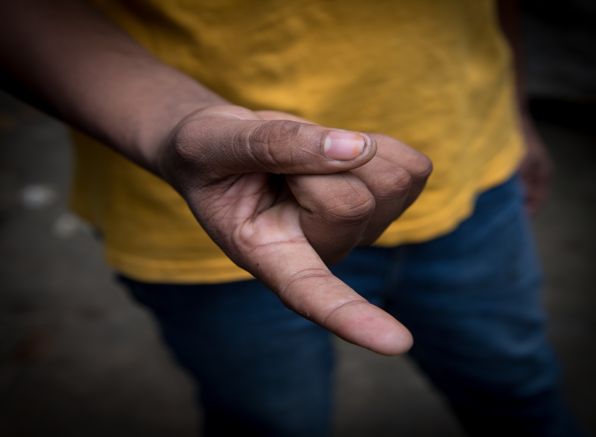

In [5]:
id_ = 'dataset_dollarstreet/assets/5d4be7b4cf0b3a0f3f345ede/5d4be7b4cf0b3a0f3f345ede.jpg'
im = Image.open(id_)
display(im.resize((596, 437)))

In [45]:

image_id = 'dataset_dollarstreet/assets/5d4be7b4cf0b3a0f3f345ede/5d4be7b4cf0b3a0f3f345ede.jpg'
function = 'This is a photo of an object that cleans teeth and gums.'

description = image2Llavacaption_dict[image_id].split(':')[-1].lstrip()
object_name = get_derived_object(function, description)
print(description)
print(object_name)

The image shows a person, likely a man, wearing a yellow shirt and holding up a finger. The person is standing in a room, possibly a living room or a similar indoor space. The focus of the image is on the person's hand and the finger they are holding up.
Finger
